# Advance Regression Assignment
#### House Price Prediction Ridge Lasso Regression

In [359]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics  import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

import warnings
from typing import Union
warnings.filterwarnings('ignore')

## Data Understanding

In [360]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [362]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#### Function to see missing values in the data

In [363]:
def missing_val_analysis(data:pd.DataFrame) -> dict:
    missing_val_cols = {}
    columns_list = []
    values_list = []

    for col in data.columns:
        if data[col].isna().sum() > 0:

            columns_list.append(str(col))
            values_list.append(float("{:.2f}".format((data[col].isna().sum()/data.shape[0])*100)))

        else:
            pass

    missing_val_cols["Columns"] = columns_list
    missing_val_cols["Missing_Val_%"] = values_list

    final_df = pd.DataFrame(data=missing_val_cols)

    return final_df



In [364]:
missing_cols_df = missing_val_analysis(data)

In [365]:
missing_cols_df

,Columns,Missing_Val_%
0,LotFrontage,17.74
1,Alley,93.77
2,MasVnrType,59.73
3,MasVnrArea,0.55
4,BsmtQual,2.53
5,BsmtCond,2.53
6,BsmtExposure,2.60
7,BsmtFinType1,2.53
8,BsmtFinType2,2.60
9,Electrical,0.07


## Data Cleaning

#### Function to  replace null values

In [366]:
def fill_null_value(data:pd.DataFrame,col:str,value:Union[None,str,int] = None,type_of_imputation: Union[None, str] = None):

    if type_of_imputation not in [None, "mean", "median"]:
        raise ValueError("type_of_imputation must be None, 'mean', or 'median'")

    if type_of_imputation == None:
        data[col] = data[col].fillna(value=value)

    elif type_of_imputation == "mean":
        data[col] = data[col].fillna(data[col].mean())

    elif type_of_imputation == "median":
        data[col] = data[col].fillna(data[col].median())

    return " Successful..."


In [367]:
# CLEANING EACH COLUMNS IN DATASET
fill_null_value(data,"Alley","No_alley_access")
fill_null_value(data,"LotFrontage",type_of_imputation="median")
fill_null_value(data,"FireplaceQu","No_Fireplace")
fill_null_value(data,"MasVnrType","None_Masonry_Veneer")
fill_null_value(data,"BsmtQual","No_Basement")
fill_null_value(data,"BsmtCond","No_Basement")
fill_null_value(data,"BsmtExposure","No_Basement")
fill_null_value(data,"BsmtFinType1","No_Basement")
fill_null_value(data,"BsmtFinType2","No_Basement")
fill_null_value(data,"GarageType","No_Garage")
fill_null_value(data,"GarageFinish","No_Garage")
fill_null_value(data,"GarageQual","No_Garage")
fill_null_value(data,"GarageCond","No_Garage")



' Successful...'

In [368]:
def drop_cols(data:pd.DataFrame,cols:Union[list,str]):

    print(f"Number of cols before dropping: {data.shape[1]}")

    data = data.drop(cols,axis=1)

    print(f"Number of cols after dropping: {data.shape[1]}")

    return data

data = drop_cols(data,['PoolQC','Fence','MiscFeature'])

Number of cols before dropping: 81
Number of cols after dropping: 78


In [369]:
missing_val_analysis(data)

,Columns,Missing_Val_%
0,MasVnrArea,0.55
1,Electrical,0.07
2,GarageYrBlt,5.55


In [370]:
data = drop_cols(data,'GarageYrBlt')

Number of cols before dropping: 78
Number of cols after dropping: 77


In [371]:
data = data.dropna(axis=0,how='any')

In [372]:
data = drop_cols(data,'Id')

Number of cols before dropping: 77
Number of cols after dropping: 76


#### Function to change data type

In [373]:
def change_dtype(data:pd.DataFrame,col:str,change_type:str):

    if change_type not in ["str", "int", "float"]:
        raise ValueError("type_of_imputation must be str, int, or float")
    
    if change_type == "str":
        data[col] = data[col].astype("str")

    elif change_type == "int":
        data[col] = data[col].astype("int")

    elif change_type == "float":
        data[col] = data[col].astype("float")

    return (f"Data type of {col} now is: {data[col].dtypes}")

#### Function to change value representation according to the data dictionary

In [374]:
def map_vals(data:pd.DataFrame,col:str,mapping_vals:dict):
    data[col] = data[col].map(mapping_vals)

    return data[col].value_counts()

## EDA

### Visualizing num variables:

<Axes: xlabel='SalePrice', ylabel='Density'>

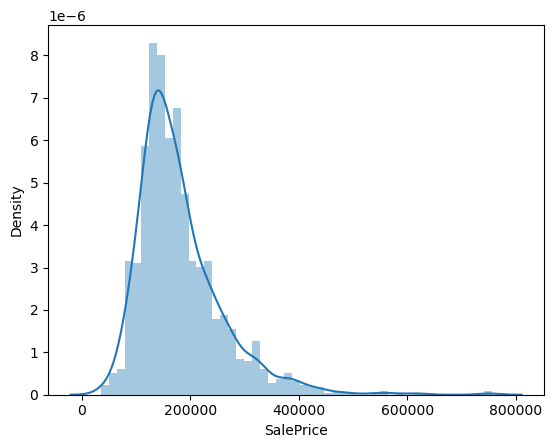

In [375]:
# Checking distribution of SalePrice
sns.distplot(data['SalePrice'])

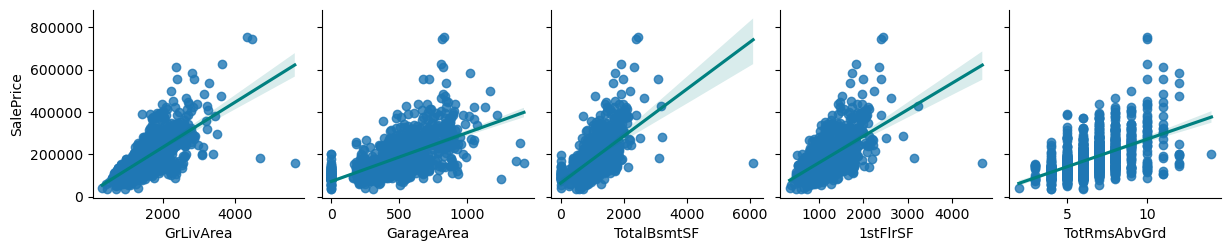

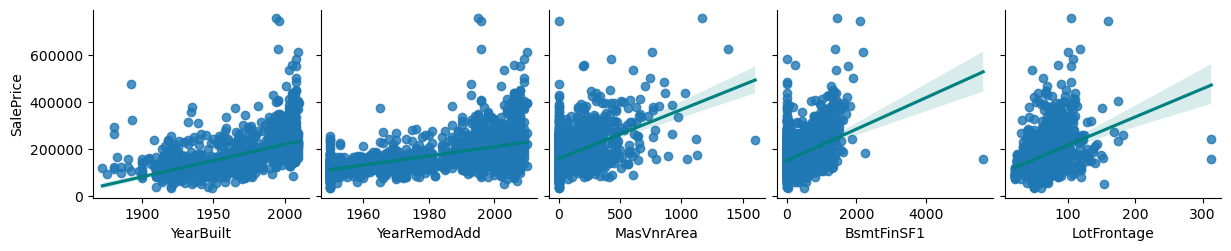

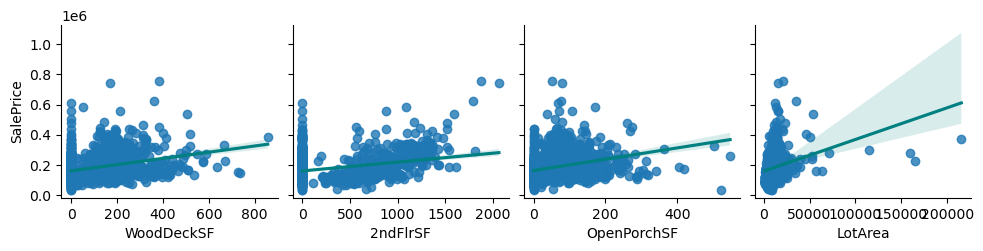

In [376]:
# Plotting numeric variables against SalePrice

numeric_cols= ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea']

sns.pairplot(data, x_vars=['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(data, x_vars=['YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','LotFrontage'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(data, x_vars=['WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})

### Visualizing categorical variables:

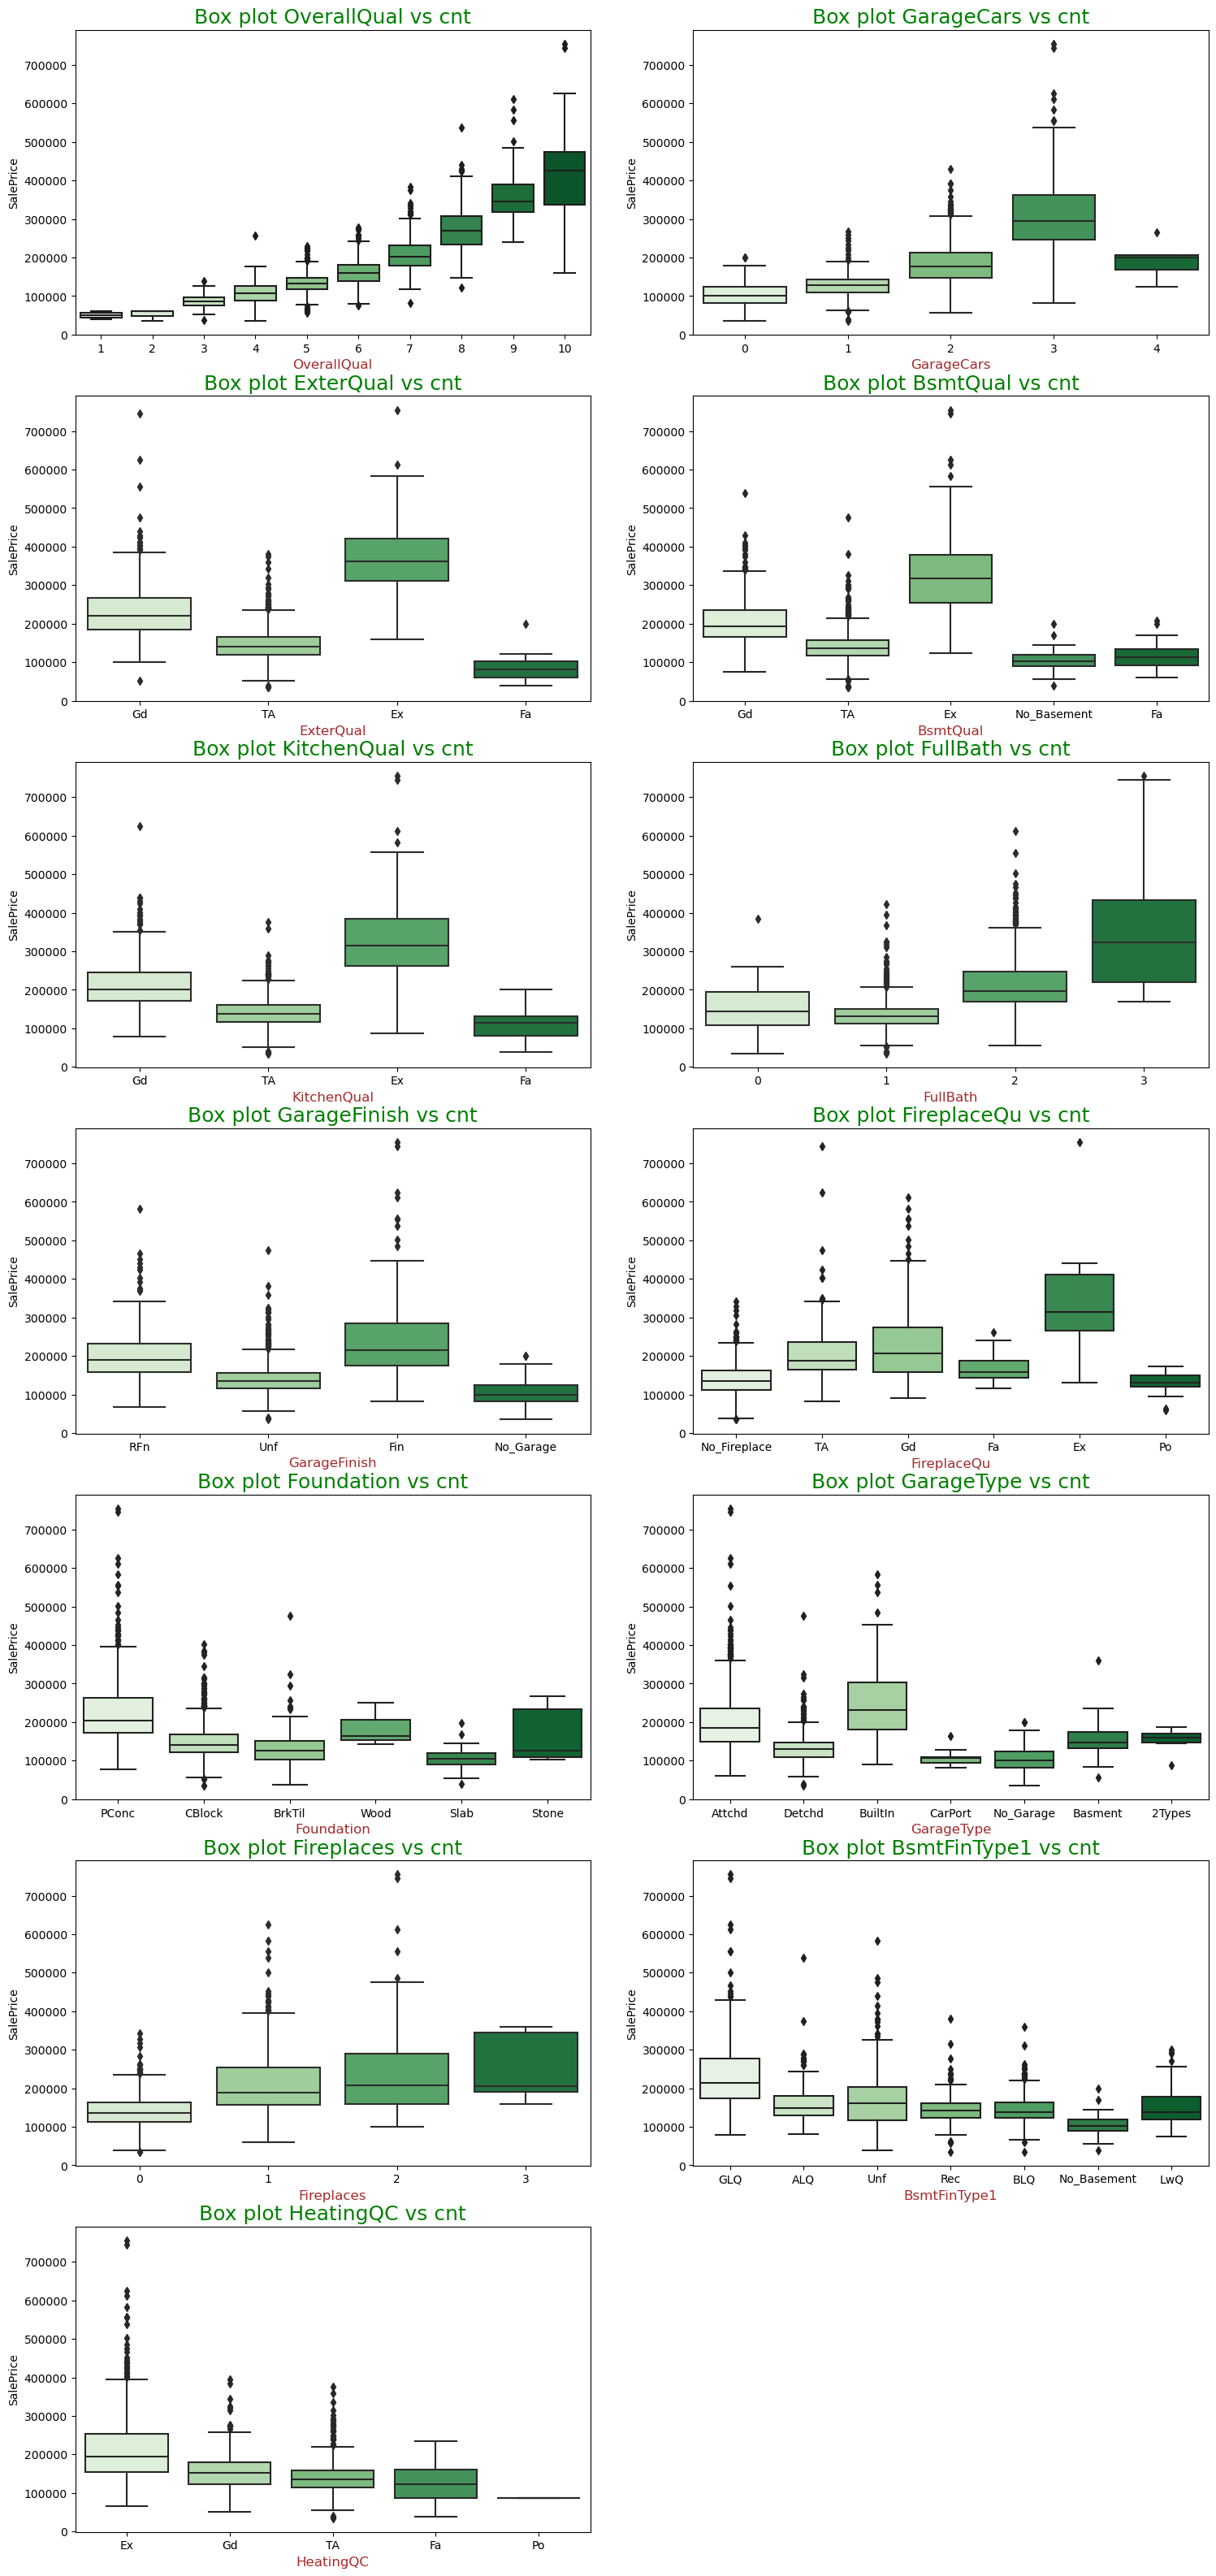

In [377]:
# Box plot 

cat_cols= ['OverallQual','GarageCars','ExterQual','BsmtQual','KitchenQual','FullBath','GarageFinish','FireplaceQu','Foundation','GarageType','Fireplaces','BsmtFinType1','HeatingQC']

plt.figure(figsize=[18, 40])

for i, col in enumerate(cat_cols, 1):
    plt.subplot(7,2,i)
    title_text= f'Box plot {col} vs cnt'
    x_label= f'{col}'
    fig= sns.boxplot(data= data, x= col, y= 'SalePrice', palette= 'Greens')
    fig.set_title(title_text, fontdict= { 'fontsize': 18, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12, 'color': 'Brown'})
plt.show()

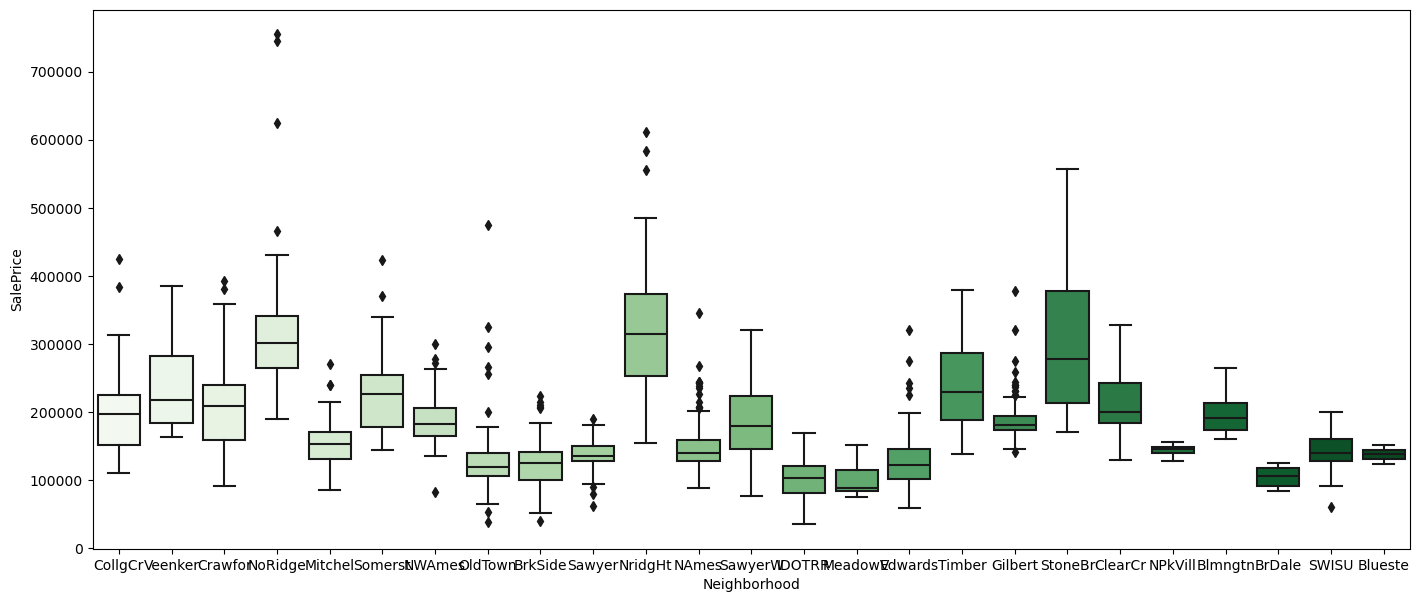

In [378]:
plt.figure(figsize=[17,7])
sns.boxplot(data= data, x= 'Neighborhood', y= 'SalePrice', palette= 'Greens')
plt.show()

### Correlation Heatmap

In [379]:
data_org= data.copy()

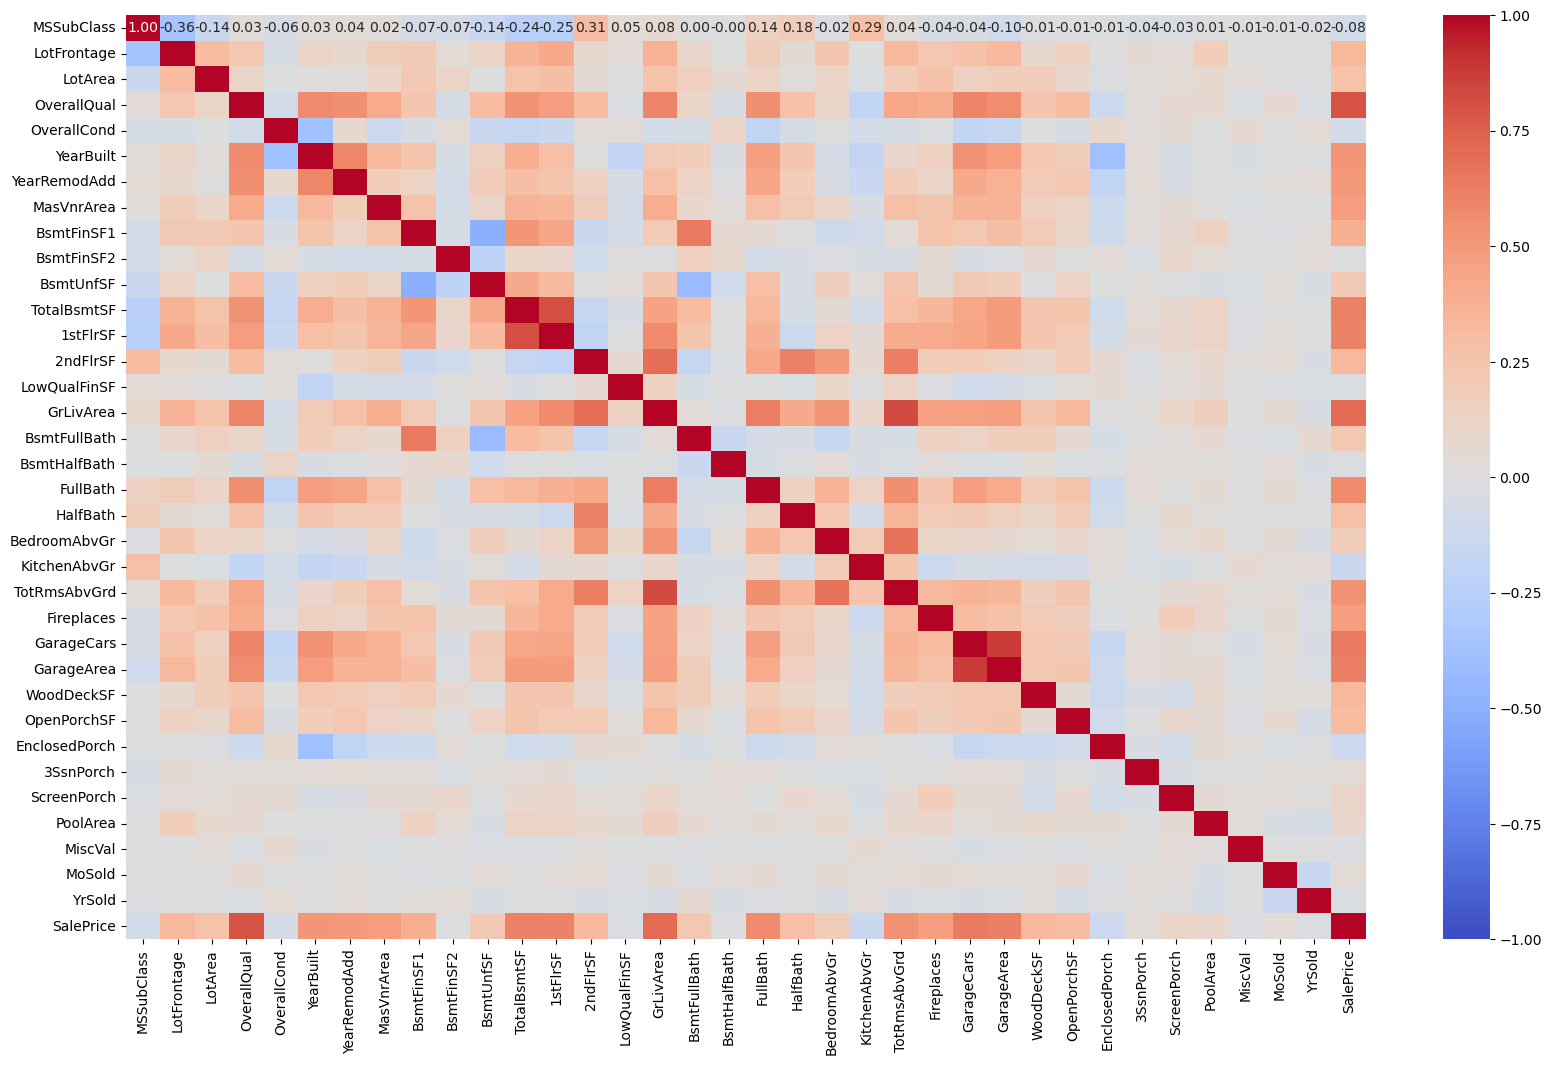

In [380]:
# Creating correlation heatmap
numeric_data = data.select_dtypes(include=["int", "float"])
plt.figure(figsize = (20, 12))
sns.heatmap(numeric_data.corr(), annot= True, cmap= 'coolwarm', fmt= '.2f', vmin= -1, vmax= 1)
plt.show()

can be seen that after log transformation SalePrice has now near normal distribution.

In [381]:
data['SalePrice_log_trans']= np.log(data['SalePrice'])

## Performing Train Test Split

In [382]:
# Train-Test Split
y= data['SalePrice_log_trans']
X= data.drop('SalePrice_log_trans', axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .7, random_state= 42)

In [383]:
# Getting index values of train test dataset
train_index= X_train.index
test_index= X_test.index

### Statistical imputation of missing values

In [384]:
# Performing Statistical Imputation for missing values in LotFrontage, MasVnrArea, MasVnrType, Electrical columns

data['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace= True)
data['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace= True)

data['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace= True)
data['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace= True)

data['MasVnrType'].fillna(X_train['MasVnrType'].mode(), inplace= True)
data['MasVnrType'].fillna(X_train['MasVnrType'].mode(), inplace= True)

data['Electrical'].fillna(X_train['Electrical'].mode(), inplace= True)
data['Electrical'].fillna(X_train['Electrical'].mode(), inplace= True)

Encoding categorical (nominal) features

In [385]:
# Getting object and numeric type columns
housing_cat= data.select_dtypes(include= 'object')
housing_num= data.select_dtypes(exclude= 'object')
housing_cat.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,...,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451
unique,5,2,3,4,4,2,5,3,25,9,...,4,7,6,7,4,6,6,3,9,6
top,RL,Pave,No_alley_access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,TA,Typ,No_Fireplace,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1145,1445,1361,918,1302,1450,1045,1373,225,1251,...,734,1352,685,863,605,1302,1317,1331,1261,1193


In [386]:
# 'Street','Utilities', 'CentralAir' have 2 unique data, so we are encoding with 0 and 1
data['Street']= data.Street.map(lambda x: 1 if x== 'Pave' else 0)
data['Utilities']= data.Utilities.map(lambda x: 1 if x== 'AllPub' else 0)
data['CentralAir']= data.CentralAir.map(lambda x: 1 if x== 'Y' else 0)

categorical (Nominal) columns One Hot Encoding will be used.

In [387]:
# Performing get_dummies
cat_cols= housing_cat.columns.tolist()
done_encoding= ['Street','Utilities', 'CentralAir']
cat_cols= [col for col in cat_cols if col not in done_encoding]
dummies= pd.get_dummies(data[cat_cols], drop_first=True)

In [388]:
dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_alley_access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,True,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [389]:
# Concatinating dummies with data dataframe and droping original features
print('data before droping original valiables', data.shape)
print('shape of dummies dataframe', dummies.shape)
data.drop(cat_cols, axis=1, inplace= True)
data= pd.concat([data, dummies], axis= 1)
print('final shape of data', data.shape)

data before droping original valiables (1451, 77)
shape of dummies dataframe (1451, 209)
final shape of data (1451, 249)


### Scaling numeric features

In [390]:
# 'Street','Utilities', 'CentralAir' have 2 unique data, so we are encoding with 0 and 1
data['Street']= data.Street.map(lambda x: 1 if x== 'Pave' else 0)
data['Utilities']= data.Utilities.map(lambda x: 1 if x== 'AllPub' else 0)
data['CentralAir']= data.CentralAir.map(lambda x: 1 if x== 'Y' else 0)

In [391]:
# Performing scaling of numeric columns in training and test dataset using RobustScaler
num_cols= housing_num.columns.tolist()
num_cols.remove('SalePrice_log_trans')
scaler= RobustScaler(quantile_range=(2, 98))
scaler.fit(X_train[num_cols])
X_train[num_cols]= scaler.transform(X_train[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])

In [392]:
# Checking scaled features
X_train[num_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
713,0.823529,-0.093750,0.011927,-0.4,0.00,-0.020408,-0.389831,0.245339,0.302045,0.0,...,0.000000,1.074605,0.0,0.0,0.0,0.0,0.0,-0.090909,-0.50,-0.107071
623,0.647059,0.000000,-0.312656,0.0,0.00,0.285714,0.118644,0.786617,0.042244,0.0,...,0.000000,0.020586,0.0,0.0,0.0,0.0,0.0,0.000000,-0.25,0.017687
592,-0.176471,-0.093750,-0.125046,-0.2,0.75,0.102041,0.169492,0.000000,0.321054,0.0,...,0.000000,-0.111166,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,-0.078645
631,0.411765,-0.364583,-0.209163,0.4,0.00,0.346939,0.220339,0.165604,-0.236566,0.0,...,0.338424,0.189394,0.0,0.0,0.0,0.0,0.0,0.181818,-0.25,0.147183
158,0.058824,0.322917,0.124041,0.2,0.00,0.326531,0.203390,0.000000,-0.097161,0.0,...,0.000000,0.448781,0.0,0.0,0.0,0.0,0.0,-0.090909,0.50,0.290576


## Model Building

### Ridge Regression

In [393]:
# Selecting few values for alpha
range1= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
range2= list(range(2, 1001))
range1.extend(range2)
params_grid= {'alpha': range1}

In [394]:
# Applying Ridge and performing GridSearchCV to find optimal value of alpha (lambda)

ridge= Ridge(random_state= 42)
gcv_ridge= GridSearchCV(estimator= ridge,
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)
gcv_ridge.fit(X_train[num_cols], y_train)

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [395]:
# Checking best estimator
gcv_ridge.best_estimator_

Ridge(alpha=0.0001, random_state=42)

In [396]:
# Checking best MAE
gcv_ridge.best_score_

-0.06667507065250444

Optimal value for alpha is 7.

In [397]:
# Fitting model using best_estimator_
ridge_model= gcv_ridge.best_estimator_
ridge_model.fit(X_train[num_cols], y_train)

Ridge(alpha=0.0001, random_state=42)

In [398]:
# Evaluating on training dataset
y_train_pred= ridge_model.predict(X_train[num_cols])
print( 'r2 score on training dataset:', r2_score(y_train, y_train_pred))
print( 'MSE on training dataset:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE on training dataset:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE on training dataset:', mean_absolute_error(y_train, y_train_pred))

r2 score on training dataset: 0.9464358813869536
MSE on training dataset: 0.008784000624663424
RMSE on training dataset: 0.09372299944337795
MAE on training dataset: 0.06288727925962699


In [399]:
# Ridge coefficients
ridge_model.coef_

array([-1.98622234e-02,  1.13202983e-02,  2.36648848e-02,  1.86026705e-01,
        1.37399587e-01,  1.78229174e-01,  1.69912371e-02, -7.07229836e-02,
        7.93371113e-03,  1.99578768e-02,  1.86043694e-02,  2.83895015e-02,
        3.20995126e-02, -5.29788013e-04,  2.94059473e-05,  2.29266424e-02,
        3.67286556e-02,  1.35006621e-02,  4.03996425e-02,  2.29687730e-02,
        1.26239219e-01, -3.01008110e-02,  5.06773928e-03,  5.94258459e-02,
        1.31225587e-01, -6.69100548e-04,  2.21305405e-02,  2.01634085e-02,
        3.84387141e-02,  1.63803221e-04,  4.06446614e-02, -3.59191122e-04,
        2.70496579e-04,  2.36053604e-02, -1.74600499e-02,  9.77757285e-01])

In [400]:
# Ridge intercept
ridge_model.intercept_

11.950305269328187

In [401]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef= pd.Series(ridge_model.coef_, index= X_train[num_cols].columns)
top_25_ridge=  ridge_coef[abs(ridge_coef).nlargest(25).index]
top_25_ridge

SalePrice        0.977757
OverallQual      0.186027
YearBuilt        0.178229
OverallCond      0.137400
GarageCars       0.131226
BedroomAbvGr     0.126239
MasVnrArea      -0.070723
Fireplaces       0.059426
ScreenPorch      0.040645
FullBath         0.040400
EnclosedPorch    0.038439
BsmtFullBath     0.036729
1stFlrSF         0.032100
KitchenAbvGr    -0.030101
TotalBsmtSF      0.028390
LotArea          0.023665
MoSold           0.023605
HalfBath         0.022969
GrLivArea        0.022927
WoodDeckSF       0.022131
OpenPorchSF      0.020163
BsmtFinSF2       0.019958
MSSubClass      -0.019862
BsmtUnfSF        0.018604
YrSold          -0.017460
dtype: float64

### Lasso Regression

In [402]:
# Applying Lasso and performing GridSearchCV to find optimal value of alpha (lambda)

params_grid= {'alpha': range1}
lasso= Lasso(random_state= 42)
lasso_gcv= GridSearchCV(estimator= lasso,
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train[num_cols], y_train)

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [403]:
# Checking best estimator
lasso_gcv.best_estimator_

Lasso(alpha=0.001, random_state=42)

In [404]:
# Checking best MAE
lasso_gcv.best_score_

-0.06587081440893376

In [405]:
range3= [0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, .0002, .0003, .0004, .0005, .0006, .0007, .0008, .0009, .001]
params_grid= {'alpha': range3}
lasso_gcv= GridSearchCV(estimator= lasso,
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train[num_cols], y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001,
                                   0.0002, 0.0003, 0.0004, 0.0005, 0.0006,
                                   0.0007, 0.0008, 0.0009, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [406]:
# Checking best estimator
lasso_gcv.best_estimator_

Lasso(alpha=0.0005, random_state=42)

In [407]:
# Fitting model using best_estimator_
lasso_model= lasso_gcv.best_estimator_
lasso_model.fit(X_train[num_cols], y_train)

Lasso(alpha=0.0005, random_state=42)

In [408]:
# Evaluating on training dataset
y_train_pred= lasso_model.predict(X_train[num_cols])
print( 'r2 score on training dataset:', r2_score(y_train, y_train_pred))
print( 'MSE on training dataset:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE on training dataset:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE on training dataset:', mean_absolute_error(y_train, y_train_pred))

r2 score on training dataset: 0.9460236043786002
MSE on training dataset: 0.008851610091461008
RMSE on training dataset: 0.09408299576151372
MAE on training dataset: 0.0625552592635115


In [409]:
# Checking no. of features in Ridge and Lasso models
lasso_coef= pd.Series(lasso_model.coef_, index= X_train[num_cols].columns)
selected_features= len(lasso_coef[lasso_coef != 0])
print('Features selected by Lasso:', selected_features)
print('Features present in Ridge:', X_train.shape[1])

Features selected by Lasso: 30
Features present in Ridge: 76


In [410]:
# Lasso intercept
lasso_model.intercept_

11.955701693788644

In [411]:
# Top 25 features with coefficients in Lasso model
top25_features_lasso=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(25).index]
top25_features_lasso

SalePrice        0.983711
OverallQual      0.189446
YearBuilt        0.165169
OverallCond      0.126078
GarageCars       0.125436
BedroomAbvGr     0.116853
Fireplaces       0.059316
MasVnrArea      -0.057508
TotalBsmtSF      0.038942
FullBath         0.033614
BsmtFullBath     0.032031
ScreenPorch      0.031545
1stFlrSF         0.029985
GrLivArea        0.028041
EnclosedPorch    0.025505
LotArea          0.023603
YearRemodAdd     0.021572
HalfBath         0.020670
KitchenAbvGr    -0.019938
WoodDeckSF       0.017857
OpenPorchSF      0.017677
MSSubClass      -0.016906
MoSold           0.015861
YrSold          -0.013777
BsmtFinSF2       0.009686
dtype: float64

## Conclusion


**Model Comparison: Ridge vs Lasso**

- **Similarities**: Both Ridge and Lasso regression models exhibit similar training and testing accuracy, suggesting no overfitting. They also yield comparable r2 scores and Mean Absolute Error (MAE) on the test dataset.

- **Differences**: The Lasso model, despite its simplicity, maintains similar r2 scores and MAE as the Ridge model. This is noteworthy as the Lasso model has eliminated a significant number of features, while the Ridge model retains all original features.

- **Final Model Selection**: Given its simplicity and comparable performance, the Lasso Regression model is our final model of choice. 

- **Key Features**: The Lasso regression model identifies a set of top features that significantly contribute to the model.
